In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
iris = datasets.load_iris()
digits = datasets.load_digits()

In [2]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
# 使用模型的简单步骤
from sklearn import svm
clf = svm.SVC(gamma=0.001,C=100)

In [5]:
clf.fit(digits.data,digits.target)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
clf.predict(digits.data[-1:])

array([8])

In [7]:
digits.target[-1:]

array([8])

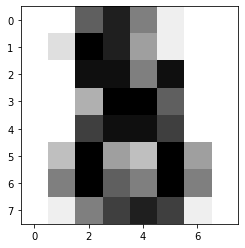

In [8]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],cmap=plt.cm.gray_r)

In [9]:
# import pickle
# s= pickle.dumps(clf)
# clf2= pickle.loads(s)
# clf2.predict(digits.data[-1:])

In [10]:
# 推荐这个
from joblib import dump,load
dump(clf,'svm_digits.joblib')

['svm_digits.joblib']

In [11]:
clf = load('svm_digits.joblib')

In [12]:
# svm是二分类，但数据有多个标签值
# 二分类转换为多分类 
from sklearn.multiclass import OneVsRestClassifier

X = [[1,2],[2,4],[4,5],[3,2],[3,1]]
y = [0,0,1,1,2] # 三个标签值

In [13]:
classif = OneVsRestClassifier(estimator=svm.SVC(random_state=0))
classif.fit(X,y).predict(X)

array([0, 0, 1, 1, 2])

In [14]:
# 一个特征属于多种标签值 需要进行二值化处理
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0,1],[0,2],[1,3],[0,2,3],[2,4]] #y[0]表示即属于0也属于1
y = MultiLabelBinarizer().fit_transform(y)
y
# 五种分类0,1,2,3,4 属于哪一种,值就为1

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1]])

In [15]:
classif.fit(X,y).predict(X)
# 存在误差,但大体接近

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In [16]:
classif.score(X,y)

0.6

In [17]:
X=iris.data
y=iris.target
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [18]:
# 分割训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# 训练出ss模型
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
ss.mean_

array([5.88660714, 3.05178571, 3.79642857, 1.22321429])

In [21]:
# 标准差
ss.scale_

array([0.86741565, 0.43424445, 1.79264014, 0.77793019])

In [22]:
# 将训练集标准化
X_train = ss.transform(X_train)
# transform 的本质就是   （X——train-均值）/ 标准差 
X_test = ss.transform(X_test)
X_train[:5],X_test[:5]

(array([[ 0.01543995, -0.11925475,  0.22512685,  0.35579762],
        [-0.09984503, -1.04039491,  0.11355956, -0.02984109],
        [ 1.05300481, -0.11925475,  0.95031423,  1.12707506],
        [-1.36797986,  0.34131533, -1.39259884, -1.31530348],
        [ 1.1682898 ,  0.11103029,  0.72717965,  1.38416753]]),
 array([[-0.09984503, -0.57982483,  0.72717965,  1.51271377],
        [ 0.13072494, -1.96153508,  0.11355956, -0.28693357],
        [-0.44569998,  2.64416573, -1.33681519, -1.31530348],
        [ 1.62942973, -0.34953979,  1.39658338,  0.74143634],
        [-1.0221249 ,  0.80188541, -1.28103155, -1.31530348]]))

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train,y_train)

knn_clf.score(X_test,y_test)

0.9736842105263158

In [24]:
# 第二个案例
X = digits.data
y= digits.target
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [25]:
kNN_clf = KNeighborsClassifier(n_neighbors=4,weights='uniform')
kNN_clf.fit(X_train,y_train)
kNN_clf.score(X_test,y_test)

0.98

In [26]:
# 通过网格搜索,获取最好的参数
# 定义超参数
param = [
    {
    'weights':['uniform'],
    'n_neighbors': np.arange(1,20),
    'algorithm':['auto','ball_tree','kd_tree','brute']
    },
    {
    'weights':['distance'],
    'n_neighbors': np.arange(1,20),
    'algorithm':['auto','ball_tree','kd_tree','brute']
    }
]

In [27]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(kNN_clf,param,n_jobs=-1)

In [28]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                          'weights': ['uniform']},
                         {'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
             

In [29]:
kNN_clf = grid_search.best_estimator_
kNN_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [30]:
grid_search.best_score_

0.9866336224700536

In [31]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [32]:
kNN_clf.predict(X_test[-1:])

array([9])

In [33]:
y_test[-1]

9

summary
    1.sklearn 数据集的导入与调用
    2.判断问题是分类还是回归
        分类(离散):y一般是2值,也可以是多值;
        回归(连续):y一般是连续值(预测房价等)
    3.建模的步骤
        例子:svm的调用
    4.对于二分类模型->多分类模型
      y为多分类值->二值化（构成矩阵）
    5.切分训练集和测试集 
      缩小数据范围：标准化scale
    6.knn+网格搜索得到最佳参数
    